In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cpu')

In [3]:
X = torch.autograd.Variable(torch.FloatTensor(np.array([[0,0],[0,1],[1,0],[1,1]])),requires_grad=False).to(device)
y = torch.autograd.Variable(torch.FloatTensor(np.array([[0,1,1,0]]).T),requires_grad=False).to(device)

X.shape, y.shape

(torch.Size([4, 2]), torch.Size([4, 1]))

In [4]:
X

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [5]:
y

tensor([[0.],
        [1.],
        [1.],
        [0.]])

In [6]:
X.requires_grad

False

In [7]:
net_xor = nn.Sequential(nn.Linear(2, 2),nn.ReLU(),nn.Linear(2,1)).to(device)
net_xor

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

In [8]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            m.weight.data.normal_(0, 1)

weights_init(net_xor)

In [9]:
optimizer_net_xor = optim.SGD(net_xor.parameters(), lr=0.002, momentum=0.9)

In [10]:
net_xor.train()
for i in range(500):
    optimizer_net_xor.zero_grad()
    output = net_xor(X)
    if i%50:
        print(output.squeeze())
        print('Accuracy: ', ((output.squeeze()>0.5)==y.squeeze().byte()).sum().item()/4)
    loss = F.mse_loss(output, y)
    loss.backward()
    optimizer_net_xor.step()

tensor([-0.5170, -0.7858, -3.1018, -3.3543], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([-0.4688, -0.7163, -2.9638, -3.1949], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([-0.4099, -0.6238, -2.7770, -2.9800], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([-0.3771, -0.5173, -2.5566, -2.7274], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([-0.3393, -0.4046, -2.3159, -2.4531], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([-0.2976, -0.3147, -2.0666, -2.1710], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([-0.2532, -0.2704, -1.8191, -1.8942], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([-0.2069, -0.2243, -1.5798, -1.6296], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([-0.1595, -0.1771, -1.3531, -1.3817], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([-0.1117, -0.1295, -1.1417, -1.1532], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([-0.0640, -0.0821, -0.9469, -0.9452], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([-0.0170, -0.0353, -0.769

In [11]:
net_xor.eval()
output = net_xor(X)
output

tensor([[0.3975],
        [0.3996],
        [0.8883],
        [0.3566]], grad_fn=<AddmmBackward0>)

In [12]:
for name, param in net_xor.named_parameters():
    if param.requires_grad:
        print (name, param.data)

0.weight tensor([[-1.1635,  0.0189],
        [ 1.4331, -0.7001]])
0.bias tensor([ 0.3516, -0.7334])
2.weight tensor([[0.1162, 0.7600]])
2.bias tensor([0.3566])


###########################################

In [13]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

In [14]:
batch_size = 32
dataset1 = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                       transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=batch_size, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:21<00:00, 456402.28it/s] 


Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 46794.37it/s]


Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:07<00:00, 225357.80it/s]


Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw



In [15]:
def draw_random_images(loader):
    rand_idxs = [np.random.randint(0, batch_size-1) for i in range (4)]
    for t in loader:
        X = t[0][rand_idxs]
        y = t[1][rand_idxs]

        print(X.shape, y.shape)

        f, axarr = plt.subplots(2,2)

        axarr[0,0].imshow(X[0].squeeze())
        axarr[0,0].set_title(str(y[0].item()))

        axarr[0,1].imshow(X[1].squeeze())
        axarr[0,1].set_title(str(y[1].item()))

        axarr[1,0].imshow(X[2].squeeze())
        axarr[1,0].set_title(str(y[2].item()))

        axarr[1,1].imshow(X[3].squeeze())
        axarr[1,1].set_title(str(y[3].item()))
        
        return X, y

torch.Size([4, 1, 28, 28]) torch.Size([4])


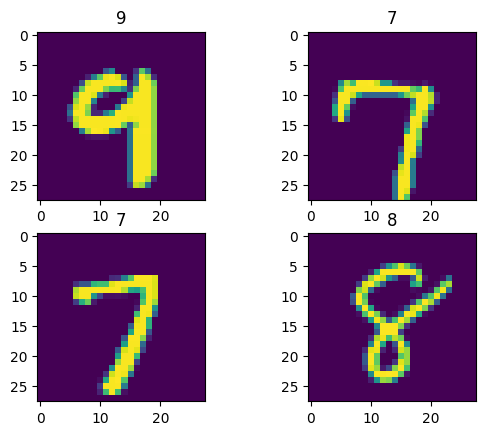

In [16]:
X, y = draw_random_images(train_loader)

In [17]:
class SimpleDenseNet(nn.Module):
    def __init__(self, input_size):
        super(SimpleDenseNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc_output = nn.Linear(256, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return F.log_softmax(self.fc_output(x))
    

In [18]:
net = SimpleDenseNet(28*28).to(device)
net

SimpleDenseNet(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc_output): Linear(in_features=256, out_features=10, bias=True)
)

In [19]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 50 == 0:
            print('Batch Accuracy: ', (torch.argmax(output,1) == target).sum().item()/batch_size)
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [20]:
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [21]:
train(net, train_loader, optimizer, 50)

C:\Users\halig\AppData\Local\Temp\ipykernel_3128\1259087578.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(self.fc_output(x))


Batch Accuracy:  0.03125
Train Epoch: 50 [0/60000 (0%)]	Loss: 2.321407
Batch Accuracy:  0.15625
Train Epoch: 50 [1600/60000 (3%)]	Loss: 2.290150
Batch Accuracy:  0.25
Train Epoch: 50 [3200/60000 (5%)]	Loss: 2.255454
Batch Accuracy:  0.25
Train Epoch: 50 [4800/60000 (8%)]	Loss: 2.262258
Batch Accuracy:  0.25
Train Epoch: 50 [6400/60000 (11%)]	Loss: 2.250042
Batch Accuracy:  0.21875
Train Epoch: 50 [8000/60000 (13%)]	Loss: 2.245552
Batch Accuracy:  0.3125
Train Epoch: 50 [9600/60000 (16%)]	Loss: 2.230746
Batch Accuracy:  0.28125
Train Epoch: 50 [11200/60000 (19%)]	Loss: 2.220270
Batch Accuracy:  0.40625
Train Epoch: 50 [12800/60000 (21%)]	Loss: 2.181601
Batch Accuracy:  0.53125
Train Epoch: 50 [14400/60000 (24%)]	Loss: 2.185799
Batch Accuracy:  0.6875
Train Epoch: 50 [16000/60000 (27%)]	Loss: 2.146823
Batch Accuracy:  0.46875
Train Epoch: 50 [17600/60000 (29%)]	Loss: 2.156515
Batch Accuracy:  0.5
Train Epoch: 50 [19200/60000 (32%)]	Loss: 2.157043
Batch Accuracy:  0.625
Train Epoch: 50 [2

In [22]:
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [23]:
test(net, test_loader)

C:\Users\halig\AppData\Local\Temp\ipykernel_3128\1259087578.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(self.fc_output(x))



Test set: Average loss: 1.1153, Accuracy: 7845/10000 (78%)



torch.Size([4, 1, 28, 28]) torch.Size([4])


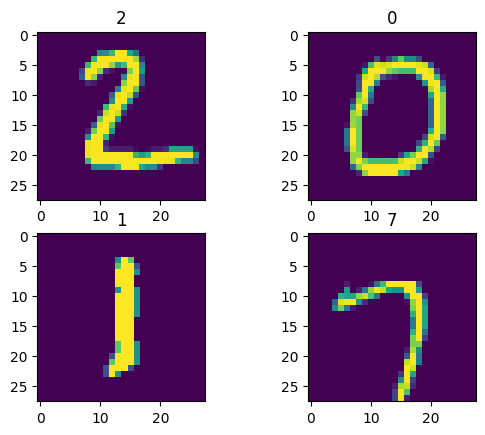

In [24]:
X, y = draw_random_images(test_loader)

In [25]:
predicted_y = net(X).argmax(1)

C:\Users\halig\AppData\Local\Temp\ipykernel_3128\1259087578.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(self.fc_output(x))


In [26]:
predicted_y

tensor([2, 0, 1, 7])

In [27]:
y

tensor([2, 0, 1, 7])